In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor    

In [20]:
df=pd.read_csv(r'C:\Users\cnc\Desktop\0.0.1\notebook\DataSet\StudentData.csv')

In [21]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


independent and dependent variable

In [22]:
x=df.drop(['math score'],axis=1)
y=df['math score']

In [23]:
x #in dataframe

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [24]:
y # in array form

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [25]:

num_columns=x.select_dtypes(exclude='object').columns
cat_columns=x.select_dtypes(include='object').columns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
numerical=StandardScaler()
categorigal=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("StandardScaling",numerical,num_columns),
        ("OneHotEncoding",categorigal,cat_columns)
    ]
)
preprocessor

ColumnTransformer(transformers=[('StandardScaling', StandardScaler(),
                                 Index(['reading score', 'writing score'], dtype='object')),
                                ('OneHotEncoding', OneHotEncoder(),
                                 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object'))])

In [26]:
x.head(),x.shape

(   gender race/ethnicity parental level of education         lunch  \
 0  female        group B           bachelor's degree      standard   
 1  female        group C                some college      standard   
 2  female        group B             master's degree      standard   
 3    male        group A          associate's degree  free/reduced   
 4    male        group C                some college      standard   
 
   test preparation course  reading score  writing score  
 0                    none             72             74  
 1               completed             90             88  
 2                    none             95             93  
 3                    none             57             44  
 4                    none             78             75  ,
 (1000, 7))

In [27]:
x=preprocessor.fit_transform(x)

In [28]:
x # in array form

array([[ 0.19399858,  0.39149181,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.42747598,  1.31326868,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60515772,  0.58901542,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

# Train Test And Split

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape



((700, 19), (700,), (300, 19), (300,))

 ### Create function for model performance

In [31]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

In [32]:
def evaluate_model(actual_Value,Predict_value): 
    mse=mean_squared_error(actual_Value,Predict_value)
    mae=mean_absolute_error(actual_Value,Predict_value)
    rmse=root_mean_squared_error(actual_Value,Predict_value)
    score=r2_score(actual_Value,Predict_value)
    
    return mse,mae,rmse,score

 ###  Creating a dictionary with keys as  models name and values for initializaing my model class
 

In [ ]:
models={
    "linearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "lasso":Lasso(),
    "knn":KNeighborsRegressor(),
    "ADR":AdaBoostRegressor(),
    "GBR":GradientBoostingRegressor(),
    "DTree":DecisionTreeRegressor(),
    "SVR":SVR(),
    "CatBoostR":CatBoostRegressor(verbose=False),
    "RFR":RandomForestRegressor()
}

model_list=[]#empty list is initialized so that we can store ore model names (keys)
r2_list=[]

#doing this so that we can loop through the ictinary and can set the fit and predict the output of our model 
for i in range(len(list(models))):

    #looping through all the methods of models

    model=list(models.values())[i]#converted the dict into list form so that we can fit our model on different models and predict them
    
    # fitting the models as an usual step and prdicting our models output 
    model.fit(x_train,y_train)
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    # now as an usual next step is to check the performance of matrix
    train_model_mse,train_model_mae,train_model_rmse,train_model_r2=evaluate_model(y_train,y_train_pred)
    test_model_mse,test_model_mae,test_model_rmse,test_model_r2=evaluate_model(y_test,y_test_pred)

    #now above things are  all done for the best model selction in the backend know using printing lets print are results
    #customizing the print for better understanding only we will do for checking the score so that we can decide which model to prict as an best model performance in both train and test 

    print(list(models.keys())[i]," : ")
    print("performance for training dataset : ")
    model_list.append(list(models.keys())[i])
    print("MSE : ",train_model_mse)
    print("RMSE : ",train_model_rmse)
    print("MAE : ",train_model_mae)
    print("R2 : ",train_model_r2)
    print(" ")
   
    print("perrformance for testing dataset")
    r2_list.append(test_model_r2)
    print("MSE : ",test_model_mse)
    print("RMSE : ",test_model_rmse)
    print("MAE : ",test_model_mae)
    print("R2 : ",test_model_r2)
    print("--------------------------------------")
    


linearRegression  : 
performance for training dataset : 
MSE :  27.544689325007596
RMSE :  5.248303471123559
MAE :  4.198519565142322
R2 :  0.8751313605993936
 
perrformance for testing dataset
MSE :  30.88659318807296
RMSE :  5.55757079919572
MAE :  4.418261320297307
R2 :  0.8758630443016738
--------------------------------------
Ridge  : 
performance for training dataset : 
MSE :  27.54838217384225
RMSE :  5.248655272909648
MAE :  4.197676960902203
R2 :  0.8751146197676473
 
perrformance for testing dataset
MSE :  30.87571166904426
RMSE :  5.556591731362334
MAE :  4.415505801902549
R2 :  0.8759067784434541
--------------------------------------
lasso  : 
performance for training dataset : 
MSE :  42.38741207281314
RMSE :  6.5105615789126166
MAE :  5.158225799581063
R2 :  0.8078446842949261
 
perrformance for testing dataset
MSE :  47.20396716994349
RMSE :  6.87051433081567
MAE :  5.392902665562179
R2 :  0.8102815436561875
--------------------------------------
knn  : 
performance for

In [34]:
range(len(list(models)))

range(0, 10)

In [29]:
list(models.values())

[LinearRegression(),
 KNeighborsRegressor(),
 Ridge(),
 Lasso(),
 AdaBoostRegressor(),
 GradientBoostingRegressor(),
 DecisionTreeRegressor(),
 SVR(),
 RandomForestRegressor()]

In [30]:
list(models.keys())

['linearRegression',
 'knn',
 'Ridge',
 'lasso',
 'ADR',
 'GBR',
 'DTree',
 'SVR',
 'RFR']

In [31]:
models.values()

dict_values([LinearRegression(), KNeighborsRegressor(), Ridge(), Lasso(), AdaBoostRegressor(), GradientBoostingRegressor(), DecisionTreeRegressor(), SVR(), RandomForestRegressor()])

In [40]:
print(model)



RandomForestRegressor()


# Picking up the best model from seeing the perfromance :<br>
Make a note have to avoid the overfited and underfitted  models <br>
overfiting: train data: r2 score accuracy high (low bias)and test data :r2 score accuracy low (high variance)<br>
underfitting :train_data: r2 score accuracy low(high bias) and test data r2 score accuracy high(low variance )<br>

In [39]:
#i have to create a dataframe where i can seee the model name with r2 scores therefore to bring it together we used zip
pd.DataFrame(list(zip(model_list,r2_list)),columns=["model_name","R2_score"]).sort_values(by=["R2_score"],ascending=False)

,model_name,R2_score
1,Ridge,0.875907
0,linearRegression,0.875863
5,GBR,0.865228
8,CatBoostR,0.852108
9,RFR,0.848981
4,ADR,0.838074
2,lasso,0.810282
3,knn,0.772327
6,DTree,0.737042
7,SVR,0.726848


since there is hardly any difference in ridge & linearregression therefore we will go with linearregresion

In [ ]:
lin_model=LinearRegression()
lin_model=lin_model.fit(x_train,y_train)

In [42]:
pickmodel

LinearRegression()

In [44]:
y_pred=lin_model.predict(x_test)

In [45]:
y_pred

array([ 76.511652  ,  58.89818013,  76.93847803,  76.96588112,
        87.63315155,  78.94668281,  64.60780093,  52.83011773,
        74.28323561,  48.94737113,  53.03440427,  36.20260815,
        67.86648609,  52.27420197,  86.79820118,  70.59883397,
        51.63855945,  46.80113844,  48.61883998,  52.72027293,
        73.89225713,  39.34102125,  57.79189897,  36.36055882,
        78.23627285,  81.63804754,  75.56062537,  46.17327085,
        31.44417895,  49.87212984,  65.58902229,  70.43151729,
        60.32667234,  83.48021561,  84.19623167,  45.82817241,
        76.05073377,  70.13652865,  65.96552567,   3.70880223,
        78.7290069 ,  67.01073937,  68.10392776,  60.49543662,
        79.65561335,  67.5109834 ,  72.06518844,  24.61823419,
        85.9787203 ,  70.49150482,  75.2833751 ,  66.72723882,
        81.4116524 ,  45.6531272 ,  66.11043199,  67.24766513,
        86.09186   ,  58.67846468,  81.91498574,  81.65594974,
        47.45253577,  72.39386125,  70.73746771,  55.70

In [48]:
score=r2_score(y_test,y_pred)*100
score

87.58630443016739

In [49]:
print("accuracy of model is %2f" %score)

accuracy of model is 87.586304


ploting the Y_pred y_test graph for better visualization

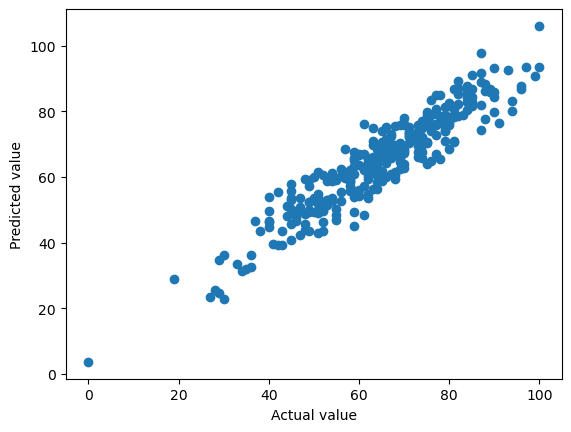

In [55]:

plt.scatter(y_test,y_pred)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

In [56]:
#lets see the predication line or best fit line

<Axes: xlabel='math score'>

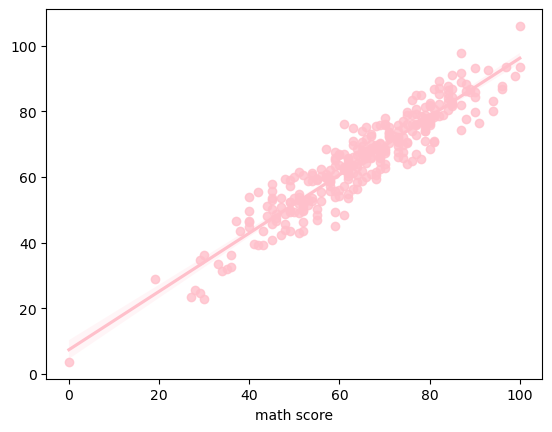

In [60]:
sns.regplot(x=y_test,y=y_pred,color="pink")

In [62]:
#now we will see the differnce between the actual value and predicated value and will create ad dataframe

In [65]:
residuals=pd.DataFrame({'Actual_value ':y_test,'predicted value':y_pred,'residuals':y_test-y_pred})
residuals

,Actual_value,predicted value,residuals
521,91,76.511652,14.488348
737,53,58.898180,-5.898180
740,80,76.938478,3.061522
660,74,76.965881,-2.965881
411,84,87.633152,-3.633152
...,...,...,...
468,77,72.854766,4.145234
935,70,62.606548,7.393452
428,65,58.650347,6.349653
7,40,44.841375,-4.841375


In [67]:
ridge_model=Ridge()
ridge_model.fit(x_train,y_train)
r_pred=ridge_model.predict(x_test)

In [69]:
score=r2_score(y_test,r_pred)*100

In [70]:
score

87.59067784434541

In [71]:
print("accuracy of ridge model: %2f"%score)

accuracy of ridge model: 87.590678


# ploting the graph for ridge model

<Axes: title={'center': 'LinearRegression model'}, xlabel='math score'>

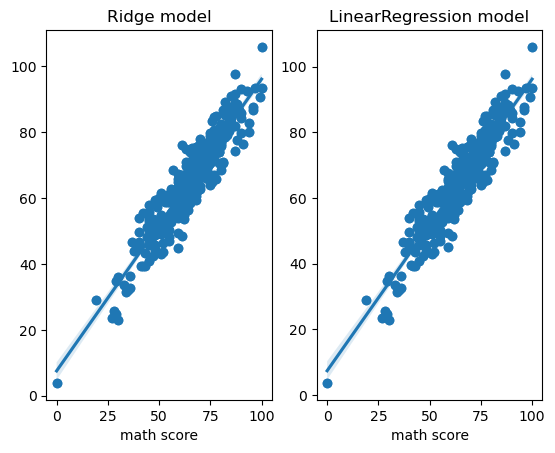

In [78]:
plt.subplot(1,2,1)
plt.title("Ridge model")
plt.scatter(y_test,r_pred)
sns.regplot(x=y_test,y=r_pred)
plt.subplot(1,2,2)
plt.title("LinearRegression model")
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred)

since here there are not many differences thereofore we can go with both models but in this project we have selected LinearRegression 